In [104]:
from google.colab import drive
drive.mount("/gdrive/")

Drive already mounted at /gdrive/; to attempt to forcibly remount, call drive.mount("/gdrive/", force_remount=True).


In [105]:
# 라이브러리 설정
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [106]:
# 데이콘 사이트에서 다운로드한 CSV 파일 읽어오기
file_path = "/gdrive/My Drive/Colab Notebooks/ML-Study/ML-Study/ML-basic/"
train = pd.read_csv(file_path + "titanic/train.csv")
test = pd.read_csv(file_path + "titanic/test.csv")
submission = pd.read_csv(file_path + "titanic/submission.csv")
print(train.shape, test.shape, submission.shape)

(891, 12) (418, 11) (418, 2)


In [107]:
# train 데이터프레임 내용 확인
train.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [108]:
# 테스트 데이터프레임 내용 확인
test.head(3)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q


In [109]:
# submission 제출 파일 양식 확인
submission.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [110]:
# train 데이터프레임 개요 정보
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [111]:
# train 데이터프레임 통계 정보
train.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


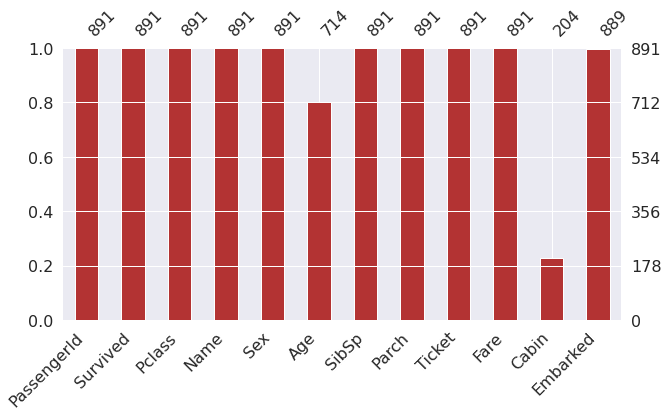

In [112]:
# 결측값 분포
import missingno as msno
msno.bar(train, figsize=(10,5), color=(0.7,0.2,0.2))
plt.show()

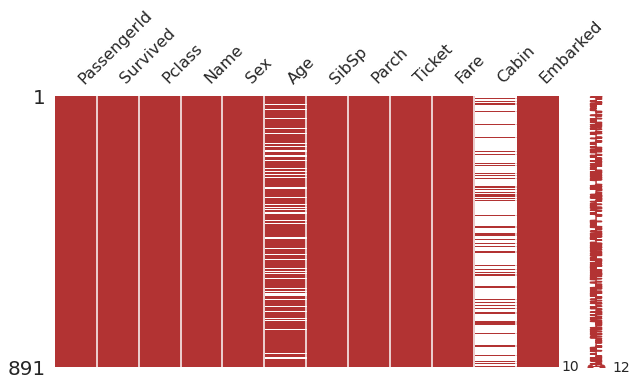

In [113]:
msno.matrix(train, figsize=(10,5), color=(0.7,0.2,0.2))
plt.show()

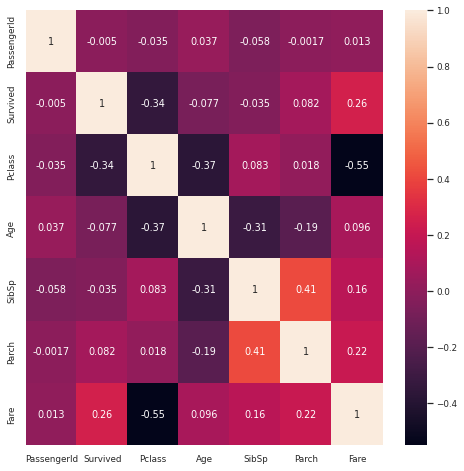

In [114]:
# 숫자형 변수 간의 상관 관계를 계산하여 히트맵 그리기
plt.figure(figsize=(8,8))
sns.set(font_scale=0.8)
sns.heatmap(train.corr(), annot=True, cbar=True)
plt.show()

In [115]:
# 숫자형 데이터만을 우선 사용하여 베이스라인 모델 만들기
# 타이타닉 전체 데이터셋 준비
train['TrainSplit'] = 'Train'
test['TrainSplit'] = 'Test'
data = pd.concat([train, test], axis=0)
print(data.shape)

(1309, 13)


In [116]:
# 데이터 전처리
# 숫자형 피처 추출
data_num = data.loc[:, ['PassengerId', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Survived']]

# 결측값 대체
data_num['Age'] = data_num['Age'].fillna(data_num['Age'].mean()) # 평균
data_num['Fare'] = data_num['Fare'].fillna(data_num['Fare'].mode()[0]) # 최빈값

# 학습용 데이터와 예측 대상인 테스트 데이터 구분
selected_features = ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']
X_train = data_num.loc[data['TrainSplit']=='Train', selected_features]
y_train = data_num.loc[data['TrainSplit']=='Train', 'Survived']

X_test = data_num.loc[data['TrainSplit']=='Test', selected_features]

print("Train 데이터셋 크기:", X_train.shape, y_train.shape)
print("Test 데이터셋 크기:", X_test.shape)

Train 데이터셋 크기: (891, 5) (891,)
Test 데이터셋 크기: (418, 5)


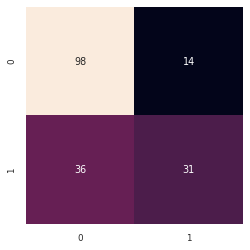

In [117]:
# 훈련 - 검증 데이터 분할
from sklearn.model_selection import train_test_split
X_tr, X_val, y_tr, y_val = train_test_split(X_train, y_train, test_size=0.2, shuffle=True, random_state=20)

# 로지스틱 회귀 모델 (이름만 회귀, 사실은 분류 알고리즘!)
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression()
lr_model.fit(X_tr, y_tr)
y_val_pred = lr_model.predict(X_val)

# Confusioin Matrix
from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix(y_val, y_val_pred), annot=True, cbar=False, square=True)
plt.show()

In [118]:
# 평가 지표
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import f1_score, roc_auc_score
print("Accuracy:%.4f" % accuracy_score(y_val, y_val_pred))
print("Precision:%.4f"% precision_score(y_val, y_val_pred))
print("Recall:%.4f" % recall_score(y_val, y_val_pred))
print("F1:%.4f" % f1_score(y_val, y_val_pred))
print("AUC:%.4f" % roc_auc_score(y_val, y_val_pred))

Accuracy:0.7207
Precision:0.6889
Recall:0.4627
F1:0.5536
AUC:0.6688


In [119]:
# test 데이터에 대한 예측값 정리
y_test_pred = lr_model.predict(X_test)

# 제출 양식에 맞게 정리
submission['Survived'] = y_test_pred.astype(int)
# # 제출 파일 저장
# submission_filepath = file_path + "titanic/baseline_num_lr_submission_001.csv"
# submission.to_csv(submission_filepath, index=False)
# submission.head()

In [120]:
# 타깃 레이블 분포 확인
train['Survived'].value_counts(dropna=False)

0    549
1    342
Name: Survived, dtype: int64

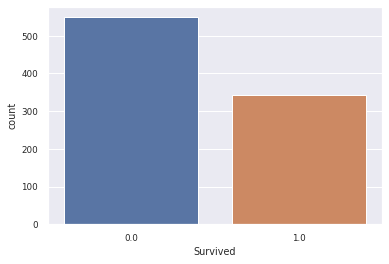

In [121]:
# 객실 등급별 분포 확인
sns.countplot(x='Survived', data=data[data['TrainSplit']=='Train'])
plt.show()

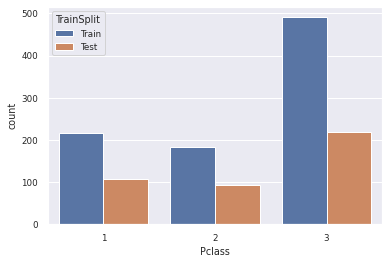

In [122]:
# train - test 데이터 분포
sns.countplot(x='Pclass', data=data, hue='TrainSplit')
plt.show()

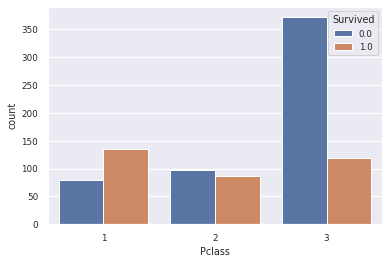

In [123]:
# Pclass별 Survived 여부
sns.countplot(x='Pclass', hue='Survived', data=data)

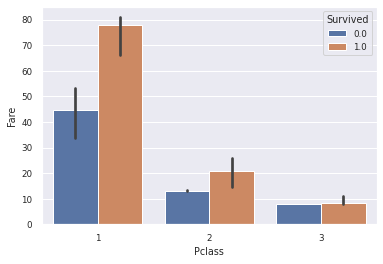

In [124]:
# Pclass별 Fare 객실 요금의 중간값 비교
sns.barplot(x='Pclass', y='Fare', hue='Survived', data=data[data['TrainSplit']=='Train'], estimator=np.median)
plt.show()

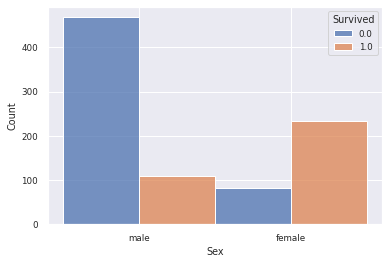

In [125]:
# hisplot 함수 - dodge 옵션
sns.histplot(x='Sex', hue='Survived', multiple='dodge', data=data[data['TrainSplit']=='Train'])
plt.show()

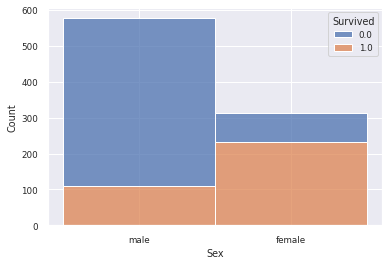

In [126]:
# histplot 함수 - stack 옵션
sns.histplot(x='Sex', hue='Survived', multiple='stack', data=data[data['TrainSplit']=='Train'])
plt.show()

In [127]:
# 레이블 인코딩 female:0, male:1
data.loc[data['Sex']=='female', 'Sex'] = 0
data.loc[data['Sex']=='male', 'Sex'] = 1
data['Sex'] = data['Sex'].astype(int)

# 성별 분포 확인
data['Sex'].value_counts(dropna=False)

1    843
0    466
Name: Sex, dtype: int64

In [128]:
data['Name'].unique()

array(['Braund, Mr. Owen Harris',
       'Cumings, Mrs. John Bradley (Florence Briggs Thayer)',
       'Heikkinen, Miss. Laina', ..., 'Saether, Mr. Simon Sivertsen',
       'Ware, Mr. Frederick', 'Peter, Master. Michael J'], dtype=object)

In [129]:
title_name = data['Name'].str.split(", ", expand=True)[1]
title_name

0                                 Mr. Owen Harris
1      Mrs. John Bradley (Florence Briggs Thayer)
2                                     Miss. Laina
3              Mrs. Jacques Heath (Lily May Peel)
4                               Mr. William Henry
                          ...                    
413                                     Mr. Woolf
414                                 Dona. Fermina
415                           Mr. Simon Sivertsen
416                                 Mr. Frederick
417                             Master. Michael J
Name: 1, Length: 1309, dtype: object

In [130]:
title = title_name.str.split(".", expand=True)[0]
title.value_counts(dropna=False)

Mr              757
Miss            260
Mrs             197
Master           61
Rev               8
Dr                8
Col               4
Mlle              2
Major             2
Ms                2
Lady              1
Sir               1
Mme               1
Don               1
Capt              1
the Countess      1
Jonkheer          1
Dona              1
Name: 0, dtype: int64

In [131]:
title = title.replace(['MS'], 'Miss')
title = title.replace(['Mlle', 'the Countess', 'Lady', 'Don', 'Dona', 'Mme', 'Sir', 'Jonkherr'], 'Noble')
title = title.replace(['Col', 'Major', 'Capt'], 'Officer')
title = title.replace(['Dr', 'Rev'], 'priest')
data['Title'] = np.array(title)
data['Title'].value_counts(dropna=False)

Mr          757
Miss        260
Mrs         197
Master       61
priest       16
Noble         8
Officer       7
Ms            2
Jonkheer      1
Name: Title, dtype: int64

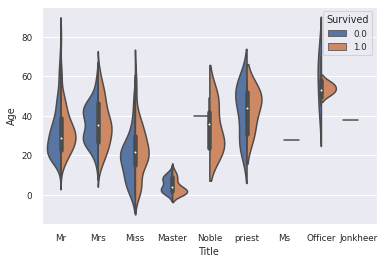

In [132]:
# 승객 나이와 생존 여부와의 관계
sns.violinplot(x='Title', y='Age', data=data, hue='Survived', split=True)
plt.show()

In [133]:
# Name 열 삭제
data = data.drop('Name', axis=1)
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked', 'TrainSplit', 'Title'],
      dtype='object')

In [134]:
# 결측값 확인 및 대체
for title in data['Title'].unique():
  # 결측값 개수 확인
  print("%s 결측값 개수:" % title, data.loc[data['Title']==title, 'Age'].isnull().sum())
  # 각 title의 중간값으로 대체
  age_med = data.loc[data['Title']==title, 'Age'].median()
  data.loc[data['Title']==title, 'Age'] = data.loc[data['Title']==title, 'Age'].fillna(age_med)

# 결측값 처리 여부 확인
print("\n")
print("Age 열의 결측값 개수:", data['Age'].isnull().sum())

Mr 결측값 개수: 176
Mrs 결측값 개수: 27
Miss 결측값 개수: 50
Master 결측값 개수: 8
Noble 결측값 개수: 0
priest 결측값 개수: 1
Ms 결측값 개수: 1
Officer 결측값 개수: 0
Jonkheer 결측값 개수: 0


Age 열의 결측값 개수: 0


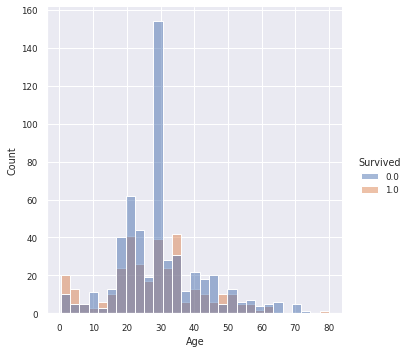

In [135]:
# Age 분포
sns.displot(x='Age', kind='hist', hue='Survived', data=data[data['TrainSplit']=='Train'])
plt.show()

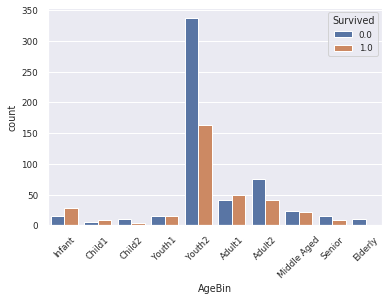

In [136]:
# 나이에 따라 생존율 차이가 나므로 히스토그램 분포를 기준으로 Age 열의 데이터를 여러 개의 구간으로 나눈다.
# Binning 기법이라고 한다.
bins = [0,4,8,12,16,32,36,48,56,64,100]
labels = ['Infant', 'Child1', 'Child2', 'Youth1', 'Youth2', 'Adult1', 'Adult2', 'Middle Aged',
          'Senior', 'Elderly']
data['AgeBin'] = pd.cut(data['Age'], bins=bins, labels=labels)

# Age_bin에 따른 생존율 비교
sns.countplot(x='AgeBin', hue='Survived', data=data[data['TrainSplit']=='Train'])
plt.xticks(rotation=45)
plt.show()

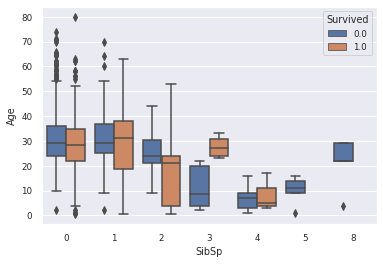

In [137]:
# 형제자매/배우자 수와 승객 나이 및 생존율 관계
sns.boxplot(x='SibSp', y='Age', hue='Survived', data=data[data['TrainSplit']=='Train'])
plt.show()

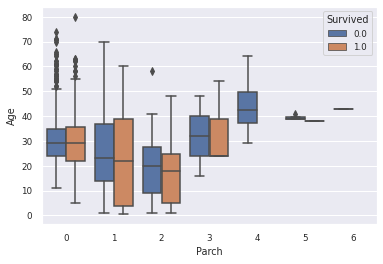

In [138]:
# 부모/자식 수에 따른 승객 나이 및 생존율 관계
sns.boxplot(x='Parch', y='Age', hue='Survived', data=data[data['TrainSplit']=='Train'])
plt.show()

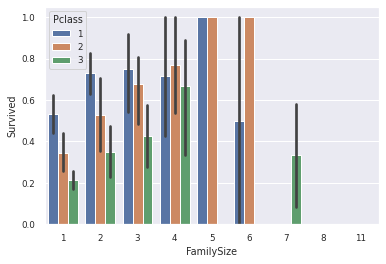

In [139]:
# 가족 구성원의 수
data['FamilySize'] = data['SibSp'] + data['Parch'] + 1

# 가족 구성원의 수와 생존율 관계
sns.barplot(x='FamilySize', y='Survived', hue='Pclass', data=data[data['TrainSplit']=='Train'],
            estimator=np.mean)
plt.show()

In [140]:
# 결측값 확인
data.loc[data['Fare'].isnull(), :]

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,TrainSplit,Title,AgeBin,FamilySize
152,1044,NaN,3,1,60.5,0,0,3701,NaN,NaN,S,Test,Mr,Senior,1


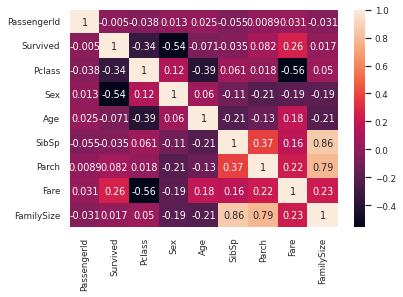

In [141]:
sns.heatmap(data.corr(), annot=True, cbar=True)
plt.show()

In [142]:
data.loc[data['Pclass']==3, 'Fare']

0       7.2500
2       7.9250
4       8.0500
5       8.4583
7      21.0750
        ...   
412     7.7750
413     8.0500
415     7.2500
416     8.0500
417    22.3583
Name: Fare, Length: 709, dtype: float64

In [143]:
# 3등석 요금의 평균값으로 결측값 대체
p3_fare_mean = data.loc[data['Pclass']==3, 'Fare'].mean()
print(p3_fare_mean)
data['Fare'] = data['Fare'].fillna(p3_fare_mean)
data.loc[data['PassengerId']==1044, :'Fare']

13.302888700564973


,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare
152,1044,NaN,3,1,60.5,0,0,3701,13.302889


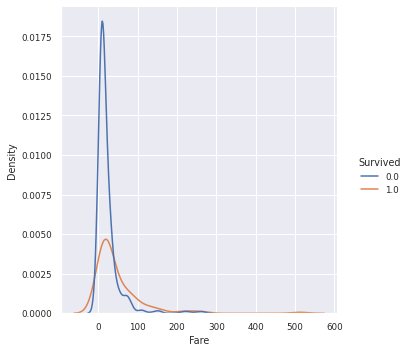

In [144]:
# fare 분포
sns.displot(x='Fare', kind='kde', hue='Survived', data=data[data['TrainSplit']=='Train'])
plt.show()

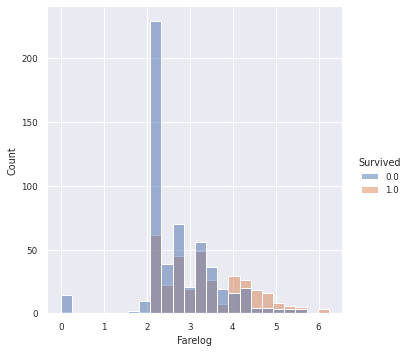

In [145]:
# log 변환
data['Farelog'] = np.log1p(data['Fare'])

# FareLog 분포
sns.displot(x='Farelog', kind='hist', hue='Survived', data=data[data['TrainSplit']=='Train'])
plt.show()

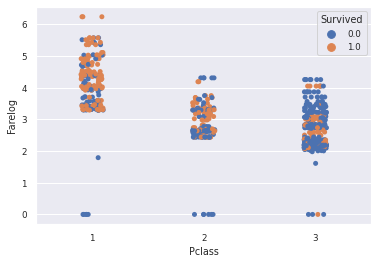

In [146]:
# 객실 등급 별 객실 요금 분포와 생존율
sns.stripplot(x='Pclass', y='Farelog', hue='Survived', data=data[data['TrainSplit']=='Train'])
plt.show()

In [147]:
# 결측값 확인
data.loc[data['Embarked'].isnull(), :]

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,TrainSplit,Title,AgeBin,FamilySize,Farelog
61,62,1.0,1,0,38.0,0,0,113572,80.0,B28,NaN,Train,Miss,Adult2,1,4.394449
829,830,1.0,1,0,62.0,0,0,113572,80.0,B28,NaN,Train,Mrs,Senior,1,4.394449


In [148]:
# Embarked의 null값을 채우기 위해 상관관계인 변수 분석
import copy
data2 = data.copy()
data2.loc[data2['Embarked']=='C', 'Embarked'] = 0
data2.loc[data2['Embarked']=='Q', 'Embarked'] = 1
data2.loc[data2['Embarked']=='S', 'Embarked'] = 2

In [149]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  1309 non-null   int64   
 1   Survived     891 non-null    float64 
 2   Pclass       1309 non-null   int64   
 3   Sex          1309 non-null   int64   
 4   Age          1309 non-null   float64 
 5   SibSp        1309 non-null   int64   
 6   Parch        1309 non-null   int64   
 7   Ticket       1309 non-null   object  
 8   Fare         1309 non-null   float64 
 9   Cabin        295 non-null    object  
 10  Embarked     1307 non-null   object  
 11  TrainSplit   1309 non-null   object  
 12  Title        1309 non-null   object  
 13  AgeBin       1309 non-null   category
 14  FamilySize   1309 non-null   int64   
 15  Farelog      1309 non-null   float64 
dtypes: category(1), float64(4), int64(6), object(5)
memory usage: 197.6+ KB


In [150]:
data2 = data2.dropna(subset=['Embarked'])
data2['Embarked'] = data2['Embarked'].astype(int)
data2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1307 entries, 0 to 417
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  1307 non-null   int64   
 1   Survived     889 non-null    float64 
 2   Pclass       1307 non-null   int64   
 3   Sex          1307 non-null   int64   
 4   Age          1307 non-null   float64 
 5   SibSp        1307 non-null   int64   
 6   Parch        1307 non-null   int64   
 7   Ticket       1307 non-null   object  
 8   Fare         1307 non-null   float64 
 9   Cabin        293 non-null    object  
 10  Embarked     1307 non-null   int64   
 11  TrainSplit   1307 non-null   object  
 12  Title        1307 non-null   object  
 13  AgeBin       1307 non-null   category
 14  FamilySize   1307 non-null   int64   
 15  Farelog      1307 non-null   float64 
dtypes: category(1), float64(4), int64(7), object(4)
memory usage: 165.0+ KB


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


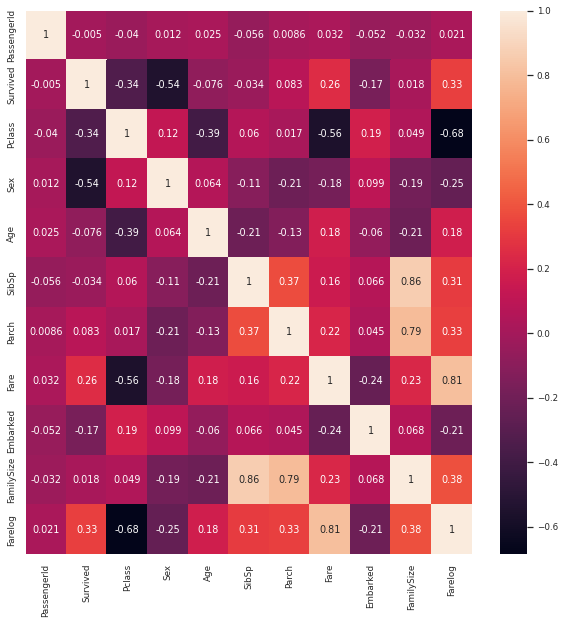

In [151]:
plt.figure(figsize=(10,10))
sns.heatmap(data2.corr(), annot=True, cbar=True)
plt.show()

In [152]:
data.loc[data['Embarked'].isnull(), :]

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,TrainSplit,Title,AgeBin,FamilySize,Farelog
61,62,1.0,1,0,38.0,0,0,113572,80.0,B28,NaN,Train,Miss,Adult2,1,4.394449
829,830,1.0,1,0,62.0,0,0,113572,80.0,B28,NaN,Train,Mrs,Senior,1,4.394449


In [153]:
data.loc[data['Fare']==80.0, :]

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,TrainSplit,Title,AgeBin,FamilySize,Farelog
61,62,1.0,1,0,38.0,0,0,113572,80.0,B28,NaN,Train,Miss,Adult2,1,4.394449
829,830,1.0,1,0,62.0,0,0,113572,80.0,B28,NaN,Train,Mrs,Senior,1,4.394449


In [154]:
data.loc[data['Pclass']==1, 'Embarked'].value_counts()

S    177
C    141
Q      3
Name: Embarked, dtype: int64

In [155]:
data.loc[data['Survived']==1, 'Embarked'].value_counts()

S    217
C     93
Q     30
Name: Embarked, dtype: int64

In [156]:
data['Embarked'].value_counts()

S    914
C    270
Q    123
Name: Embarked, dtype: int64

In [157]:
# 최빈값으로 null값을 채우자.
data['Embarked'] = data['Embarked'].fillna('S')

In [158]:
data.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Sex               0
Age               0
SibSp             0
Parch             0
Ticket            0
Fare              0
Cabin          1014
Embarked          0
TrainSplit        0
Title             0
AgeBin            0
FamilySize        0
Farelog           0
dtype: int64

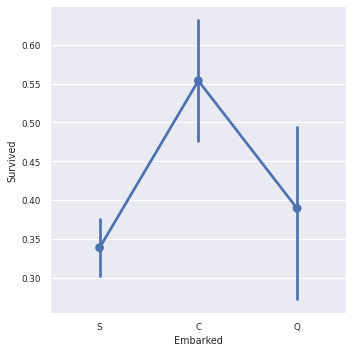

In [159]:
# 탑승 항구별 생존율 비교
sns.catplot(x='Embarked', y='Survived', kind='point', data=data[data['TrainSplit']=='Train'])
plt.show()

In [160]:
# 고유값 확인
data['Cabin'].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [161]:
# 첫번째 알파벳 이니셜 추출
data['Cabin'].str.slice(0,1).value_counts(dropna=False)

NaN    1014
C        94
B        65
D        46
E        41
A        22
F        21
G         5
T         1
Name: Cabin, dtype: int64

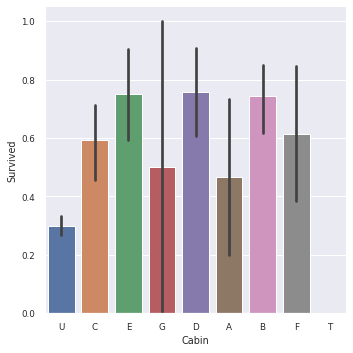

In [162]:
# 알파벳 이니셜로 대체, 결측값은 'U'로 입력
data['Cabin'] = data['Cabin'].str.slice(0,1)
data['Cabin'] = data['Cabin'].fillna('U')

# Cabin 구역별 생존율 비교
sns.catplot(x='Cabin', y='Survived', kind='bar', data=data[data['TrainSplit']=='Train'])
plt.show()

In [163]:
# 티켓 고유값 확인
data['Ticket'].value_counts(dropna=False)

CA. 2343        11
CA 2144          8
1601             8
PC 17608         7
S.O.C. 14879     7
                ..
113792           1
36209            1
323592           1
315089           1
359309           1
Name: Ticket, Length: 929, dtype: int64

In [164]:
# 문자열 정리 - 알파벳 추출
data['Ticket'] = data['Ticket'].str.replace(".","").str.replace("/","")
data['Ticket'] = data['Ticket'].str.strip().str.split(' ').str[0]
data['Ticket'].value_counts(dropna=False)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  


PC         92
CA         68
A5         28
SOTONOQ    24
WC         15
           ..
239854      1
4134        1
11771       1
65304       1
359309      1
Name: Ticket, Length: 741, dtype: int64

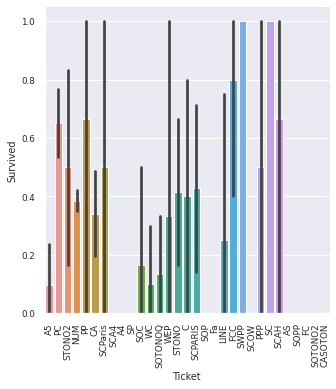

In [165]:
# 문자열이 숫자인 경우 'NUM'으로 대체
data.loc[data['Ticket'].str.isdigit(), 'Ticket'] = 'NUM'
data['Ticket'].value_counts(dropna=False)[:10]

# Ticket 번호별 생존율 비교
sns.catplot(x='Ticket', y='Survived', kind='bar', data=data[data['TrainSplit']=='Train'])
plt.xticks(rotation=90)
plt.show()

In [166]:
# Label Encoding
from sklearn.preprocessing import LabelEncoder
for col in ['Title', 'AgeBin']:
  encoder = LabelEncoder()
  data[col] = encoder.fit_transform(data[col])

data.loc[:, ['Title', 'AgeBin']].head()

,Title,AgeBin
0,3,9
1,4,1
2,2,9
3,4,0
4,3,0


In [167]:
# 범주형 변수로 변환 및 원핫 인코딩
onehot_prefix = []
for col in ['Embarked', 'Cabin', 'Ticket']:
  data[col] = data[col].astype('category')
  # 열 이름을 [prefix + _ + 범주데이터] 형태로 변환. 
  # drop_first=True로 첫번째열 삭제
  data = pd.get_dummies(data, columns=[col], prefix=col[:3], drop_first=True)
  onehot_prefix.append(col[:3])

data.loc[:, [col for col in data.columns if col[:3] in onehot_prefix]].head()

,Emb_Q,Emb_S,Cab_B,Cab_C,Cab_D,Cab_E,Cab_F,Cab_G,Cab_T,Cab_U,...,Tic_SOPP,Tic_SOTONO2,Tic_SOTONOQ,Tic_SP,Tic_STONO,Tic_STONO2,Tic_STONOQ,Tic_SWPP,Tic_WC,Tic_WEP
0,0,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
3,0,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [168]:
# 피처 스케일링
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

# 스케일링 처리할 피처 선택 - TrainSplit 등 일부 열 제외
scaled_cols = [col for col in data.loc[:, 'Pclass':].columns if col != 'TrainSplit']

data_scaled = data.loc[:, scaled_cols]
data_scaled = scaler.fit_transform(data_scaled)

# 스메일링 변환된 값을 데이터프레임에 반영
data.loc[:, scaled_cols] = data_scaled[:,:]
data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,TrainSplit,Title,...,Tic_SOPP,Tic_SOTONO2,Tic_SOTONOQ,Tic_SP,Tic_STONO,Tic_STONO2,Tic_STONOQ,Tic_SWPP,Tic_WC,Tic_WEP
0,1,0.0,1.0,1.0,0.273456,0.125,0.0,0.014151,Train,0.375,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,1.0,0.0,0.0,0.473882,0.125,0.0,0.139136,Train,0.500,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,1.0,1.0,0.0,0.323563,0.000,0.0,0.015469,Train,0.250,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,4,1.0,0.0,0.0,0.436302,0.125,0.0,0.103644,Train,0.500,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5,0.0,1.0,1.0,0.436302,0.000,0.0,0.015713,Train,0.375,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [169]:
print(data.columns)
selected_features = [col for col in data.columns if col not in ['PassengerId', 'Survived', 'Fare', 'TrainSplit', 'Age']]
print(len(selected_features))
# selected_features

Index(['PassengerId', 'Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch',
       'Fare', 'TrainSplit', 'Title', 'AgeBin', 'FamilySize', 'Farelog',
       'Emb_Q', 'Emb_S', 'Cab_B', 'Cab_C', 'Cab_D', 'Cab_E', 'Cab_F', 'Cab_G',
       'Cab_T', 'Cab_U', 'Tic_A4', 'Tic_A5', 'Tic_AQ3', 'Tic_AQ4', 'Tic_AS',
       'Tic_C', 'Tic_CA', 'Tic_CASOTON', 'Tic_FC', 'Tic_FCC', 'Tic_Fa',
       'Tic_LINE', 'Tic_LP', 'Tic_NUM', 'Tic_PC', 'Tic_PP', 'Tic_PPP',
       'Tic_SC', 'Tic_SCA3', 'Tic_SCA4', 'Tic_SCAH', 'Tic_SCOW', 'Tic_SCPARIS',
       'Tic_SCParis', 'Tic_SOC', 'Tic_SOP', 'Tic_SOPP', 'Tic_SOTONO2',
       'Tic_SOTONOQ', 'Tic_SP', 'Tic_STONO', 'Tic_STONO2', 'Tic_STONOQ',
       'Tic_SWPP', 'Tic_WC', 'Tic_WEP'],
      dtype='object')
54


In [170]:
# 학습용 데이터와 예측 대상인 테스트 데이터 구분
X_train = data.loc[data['TrainSplit']=='Train', selected_features]
y_train = data.loc[data['TrainSplit']=='Train', 'Survived']
X_test = data.loc[data['TrainSplit']=='Test', selected_features]
print("Train 데이터셋 크기:", X_train.shape, y_train.shape)
print("Test 데이터셋 크기:", X_test.shape)

Train 데이터셋 크기: (891, 54) (891,)
Test 데이터셋 크기: (418, 54)


In [171]:
# 훈련 - 검증 데이터 분할
from sklearn.model_selection import train_test_split
X_tr, X_val, y_tr, y_val = train_test_split(X_train, y_train, test_size=0.2, shuffle=True, random_state=20)

print("훈련 데이터셋 크기:", X_tr.shape, y_tr.shape)
print("검증 데이터셋 크기:", X_val.shape, y_tr.shape)

훈련 데이터셋 크기: (712, 54) (712,)
검증 데이터셋 크기: (179, 54) (712,)


In [172]:
# 로지스틱 회귀 모델
lr_model = LogisticRegression()
lr_model.fit(X_tr, y_tr)

y_tr_pred = lr_model.predict(X_tr)
print("훈련 Accuracy:%.4f" % accuracy_score(y_tr, y_tr_pred))
print("훈련 AUC:%.4f" % roc_auc_score(y_tr, y_tr_pred))

y_val_pred = lr_model.predict(X_val)
print("검증 Accuracy:%.4f" % accuracy_score(y_val, y_val_pred))
print("검증 AUC:%.4f" % roc_auc_score(y_val, y_val_pred))

훈련 Accuracy:0.7978
훈련 AUC:0.7847
검증 Accuracy:0.8380
검증 AUC:0.8106


In [173]:
# # test 데이터 예측 및 제출 파일 저장
# y_test_pred = lr_model.predict(X_test)
# submission['Survived'] = y_test_pred.astype(int)
# submission_filepath = file_path + 'titanic/baseline_lr_submission_001.csv'
# submission.to_csv(submission_filepath, index=False)

In [174]:
# 랜덤 포레스트
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(random_state=2020)
# cross_val_score 함수
from sklearn.model_selection import cross_val_score
auc_scores = cross_val_score(lr_model, X_train, y_train, cv=5, scoring='roc_auc')
print("개별 Fold의 AUC점수:", np.round(auc_scores, 4))
print("평균 AUC 점수:", np.round(np.mean(auc_scores), 4))

개별 Fold의 AUC점수: [0.8348 0.8177 0.8794 0.8535 0.8672]
평균 AUC 점수: 0.8505


In [175]:
# 제출 파일
rf_model.fit(X_train, y_train)
y_test_pred = rf_model.predict(X_test)
submission['Survived'] = y_test_pred
submission_filepath = file_path + 'titanic/baseline_rf_submission_001.csv'
submission.to_csv(submission_filepath, index=False)

In [176]:
# tree 계열 알고리즘의 feature importance 그래프
def plot_importance(model, features):
  importances = model.feature_importances_
  indices = np.argsort(importances)
  feature_names = [features[i] for i in indices]
  feature_imp = importances[indices]

  plt.figure(figsize=(10,12))
  plt.title('Feature Importance')
  plt.barh(range(len(indices)), feature_imp, align='center')
  plt.yticks(range(len(indices)), feature_names)
  plt.xlabel('Relative Importance')

  print("피처:", list(reversed(feature_names)))
  print("중요도:", list(reversed(feature_imp)))

  return list(reversed(feature_names)), list(reversed(feature_imp))

피처: ['Farelog', 'Sex', 'Title', 'AgeBin', 'Pclass', 'FamilySize', 'SibSp', 'Cab_U', 'Parch', 'Emb_S', 'Tic_NUM', 'Emb_Q', 'Cab_D', 'Cab_E', 'Cab_B', 'Cab_C', 'Tic_PC', 'Tic_SWPP', 'Tic_STONO', 'Tic_CA', 'Tic_WC', 'Tic_A5', 'Tic_C', 'Tic_SOTONOQ', 'Tic_STONO2', 'Cab_F', 'Tic_SCPARIS', 'Tic_LINE', 'Cab_G', 'Tic_SOPP', 'Tic_SOC', 'Tic_WEP', 'Tic_SCParis', 'Tic_FCC', 'Tic_PP', 'Tic_SCAH', 'Tic_FC', 'Tic_A4', 'Cab_T', 'Tic_PPP', 'Tic_SOP', 'Tic_SC', 'Tic_SOTONO2', 'Tic_AS', 'Tic_CASOTON', 'Tic_SCA4', 'Tic_SCOW', 'Tic_Fa', 'Tic_SP', 'Tic_LP', 'Tic_AQ3', 'Tic_SCA3', 'Tic_STONOQ', 'Tic_AQ4']
중요도: [0.2306290643408734, 0.18796583098540373, 0.12393822898956534, 0.08248831502082941, 0.05900278767086178, 0.05537760939684124, 0.04055296320486255, 0.04047727846678878, 0.02985559881381375, 0.02289966649443544, 0.015725932847936712, 0.011182440241043144, 0.010115073388499443, 0.009745428846528957, 0.009376837556482644, 0.009034753452111374, 0.008378450600337777, 0.007102074483656911, 0.0067768552655325

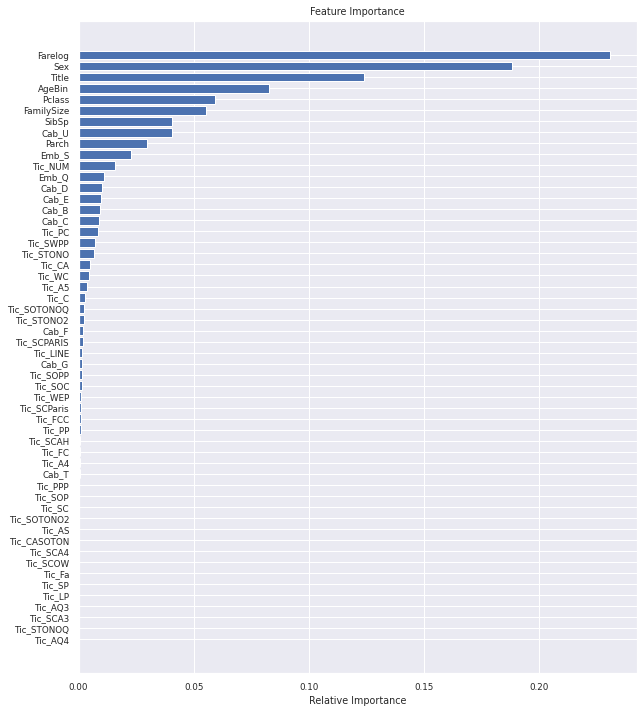

In [177]:
# 랜덤 포레스트 모델의 피처 중요도
imp_features, imp_socres = plot_importance(rf_model, selected_features)

In [179]:
# 상위 10개 피처만 선택
selected_features = imp_features[:10]
y_train = data.loc[data['TrainSplit']=='Train', 'Survived']
X_train = data.loc[data['TrainSplit']=='Train', selected_features]
X_test = data.loc[data['TrainSplit']=='Test', selected_features]
print("Train 데이터셋 크기:", X_train.shape, y_train.shape)
print("Test 데이터셋 크기:", X_test.shape)

Train 데이터셋 크기: (891, 10) (891,)
Test 데이터셋 크기: (418, 10)


In [181]:
rf_model = RandomForestClassifier(random_state=2020)
auc_scores = cross_val_score(rf_model, X_train, y_train, cv=5, scoring='roc_auc')
print("개별 fold AUC점수:", np.round(auc_scores,4))
print("평균 AUC 점수:", np.round(np.mean(auc_scores),4))
rf_model.fit(X_train, y_train)
y_test_pred = rf_model.predict(X_test)
# submission['Survived'] = y_test_pred
# submission_filepath = file_path + "titanic/baseline_rf_submission_002.csv"
# submission.to_csv(submission_filepath, index=False)

개별 fold AUC점수: [0.8664 0.8044 0.9011 0.8431 0.8836]
평균 AUC 점수: 0.8597


In [183]:
# XGBoost 모델
from xgboost import XGBClassifier
xgb_model = XGBClassifier(max_depth=3, random_state=2020)
auc_scores = cross_val_score(xgb_model, X_train, y_train, cv=3, scoring='roc_auc')
print("개별 fold AUC점수:", np.round(auc_scores,4))
print("평균 AUC 점수:", np.round(np.mean(auc_scores),4))
xgb_model.fit(X_train, y_train)
y_test_pred = xgb_model.predict(X_test)
# submission['Survived'] = y_test_pred.astype(int)
# submission_filepath = file_path + "titanic/baseline_xgb_submission_001.csv"
# submission.to_csv(submission_filepath, index=False)

개별 fold AUC점수: [0.8369 0.8889 0.9057]
평균 AUC 점수: 0.8772


In [185]:
# 확률값 예측
y_xgb_proba = xgb_model.predict_proba(X_test)[:,1]
y_rf_proba = rf_model.predict_proba(X_test)[:,1]

# 앙상블 기법
y_proba = (y_xgb_proba + y_rf_proba) / 2
submission['Survived'] = y_proba
submission_filepath = file_path + "titanic/baseline_proba_submission_001.csv"
submission.to_csv(submission_filepath, index=False)